In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

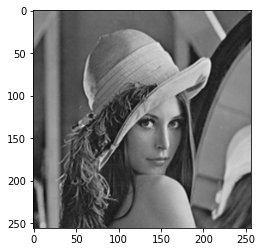

In [3]:
# Question 1-1) 

### Convert the image from RGB to gray using a standard RGB-intensity conversion approach ###

LennaRGB = cv2.imread("Lenna.jpg")

"""Function to convert the RGB image to Gray scale color space"""

def RGB2GRAY(img):
    blue = 0.07*img[:,:,2]
    green = 0.72*img[:,:,1]
    red = 0.21*img[:,:,0]
    gray_img = red+blue+green
    return gray_img

LennaGray = RGB2GRAY(LennaRGB).astype(np.uint8)
cv2.imwrite("LennaGray.jpg", LennaGray)
display = plt.imshow(LennaGray, cmap='gray', vmin=0, vmax=255)

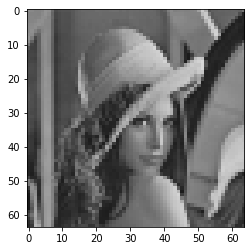

In [4]:
# Question 1-2) 

### Down-sampling from size 256x256 to 64x64 ###

img = cv2.imread("LennaGray.jpg")
pixels = []
r = int(256/64)

for i in range(0, img.shape[0]-3, r):
    for j in range(0, img.shape[1]-3, r):
        temp = img[i:i+4, j:j+4]
        pixels.append(np.mean(temp)) #taking mean from selected 4x4 pool to get one pixel value 

pixels = np.array(pixels)
Resized_LennaGray = pixels.reshape(64, 64)

cv2.imwrite("Resized_LennaGray.jpg", Resized_LennaGray)
plt.imshow(Resized_LennaGray, cmap="gray", vmin=0, vmax=255)
plt.show()

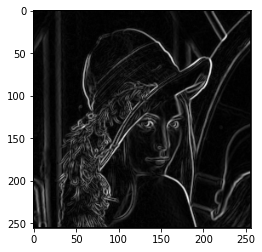

In [5]:
# Question 1-3)

### Implementing convolution of sobel kernel using airthmetic operation ###

sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_filter_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

"""Function to convert the Grayscale image to Sobel filtered image"""

def SobelFilter(Img):
    row, column = np.shape(Img)
    sobel_filtered_image = np.zeros(shape = (row, column))
    for i in range(row-2):
        for j in range(column-2):
            gx = np.sum(np.multiply(sobel_filter_x, Img[i:i + 3, j:j + 3]))  # x direction
            gy = np.sum(np.multiply(sobel_filter_y, Img[i:i + 3, j:j + 3]))  # y direction
            sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  # estimating the "hypotenuse"           
    plt.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))

SobelFilter(LennaGray)

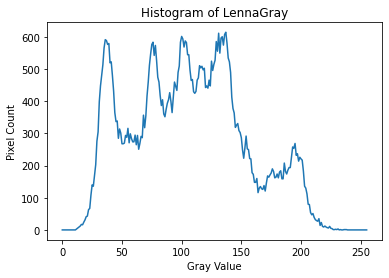

In [6]:
# Question 2-1)

### Histogram analysis and visualization ###

"""Function to visualize the histogram of a grayscaled image"""

def hist(Img):
    row, column = np.shape(Img)
    value = [] #list to store gray values
    count = [] #list to store the count
    for h in range (0, 256):
        value.append(h)
        count1 = 0
        for i in range(row):
            for j in range(column):
                if Img[i,j] == h:
                    count1+=1
        count.append(count1)
    return (value, count)

value1, count2 = hist(LennaGray)
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.title('Histogram of LennaGray')
display = plt.plot(value1, count2)

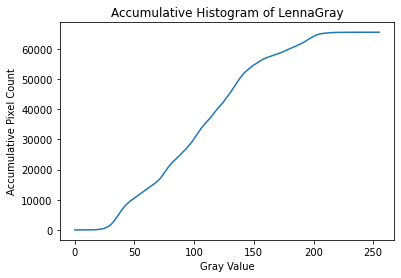

In [46]:
# Question 2-2)

### Accumulative Histogram analysis and visualization ###

accum = []
l = len(count2)
m = 0
for k in range(0, l):
    m+=count2[k]
    accum.append(m)
plt.xlabel('Gray Value')
plt.ylabel('Accumulative Pixel Count')
plt.title('Accumulative Histogram of LennaGray')
display = plt.plot(value1,accum)

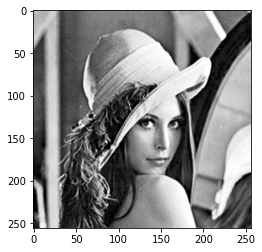

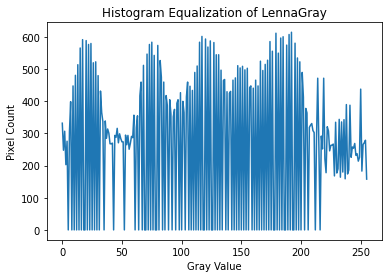

In [102]:
# Question 2-3)

### Visualizing the histogram-equalized image and its histogram distribution. ###

"""Function to visualize the equalized image"""

def eq_hist(Img):
    eq_hist = np.zeros(256, dtype=int)
    Img_flat = Img.flatten()
    for i in range(0, len(eq_hist)):
        n = len(Img_flat)/256
        eq_hist[i] = max(0, (round(accum[i]/n) - 1))
    eq_img = np.zeros(Img.size, dtype=int)
    
    for j in range(0, Img.size):
        eq_img[j] = eq_hist[Img_flat[j]]
    eq_img = eq_img.reshape(256,256)
    return eq_img

"""Function to visualize the equalized histogram"""

def eq_hist_dist(Img):
    row, column = np.shape(Img)
    value = [] #list to store gray values
    count = [] #list to store the count
    for h in range (0, 256):
        value.append(h)
        count1 = 0
        for i in range(row):
            for j in range(column):
                if Img[i,j] == h:
                    count1+=1
        count.append(count1)
    return (value, count)

#Visualizing equalized histogram image
f = plt.figure()
eq_img = eq_hist(LennaGray)
display = plt.imshow(eq_img, cmap="gray", vmin=0, vmax=255)

#Visualizing equalized histogram distribution 
f = plt.figure()
plt.xlabel('Gray Value')
plt.ylabel('Pixel Count')
plt.title('Histogram Equalization of LennaGray')
v, c = eq_hist_dist(eq_img)
display = plt.plot(v, c)

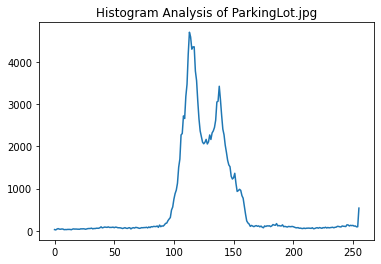

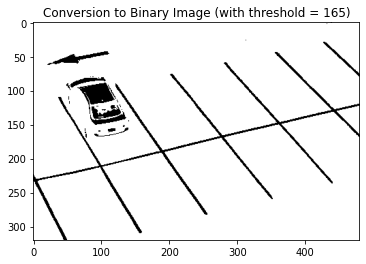

In [116]:
# Question 3-1)

image = cv2.imread('ParkingLot.jpg',0)

### Visualizing histogram analysis ###

histogram = cv2.calcHist([image],[0],None,[256],[0,256]) #estimating frequency of pixels in range 0-255
plt.plot(histogram)
plt.title('Histogram Analysis of ParkingLot.jpg')
display = plt.show()

### Converting image to binary image ###

ret, thresh1 = cv2.threshold(image, 165, 255, cv2.cv2.THRESH_BINARY_INV) #defining binary threshold as 165
cv2.imwrite("ParkingLotBinary.jpg", thresh1)
plt.title('Conversion to Binary Image (with threshold = 165)')
display = plt.imshow(thresh1, cmap=plt.get_cmap('gray'))

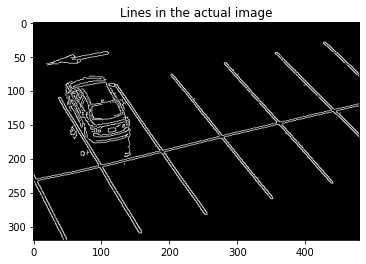

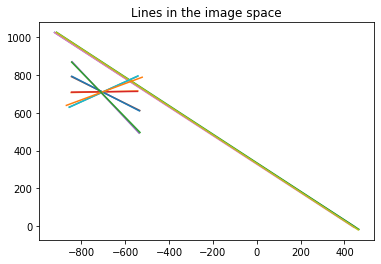

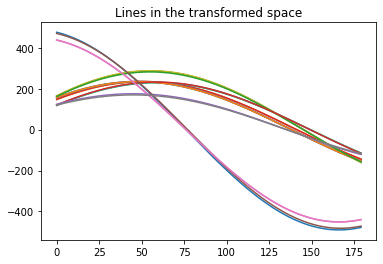

In [48]:
# Question 3-2)

### Visualizing lines in the image ###

image = cv2.imread('ParkingLot.jpg')
grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(grayscale, 50, 150, apertureSize=3)
plt.figure()
plt.title('Lines in the actual image')
plt.imshow(edges, cmap = 'gray')
        
### Visualizing lines in the image space ###

import math
image = cv2.imread('ParkingLot.jpg')
grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(grayscale, 50, 150, apertureSize=3)
plt.imshow(edges, cmap = 'gray')
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    plt.figure()
    plt.title('Lines in the image space')
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
        plt.plot(pt1,pt2)


### Visualizing the lines in the transformed space ###

lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, maxLineGap = 1000)
poles = []
theta = np.arange(0,np.pi,np.pi/180)
plt.figure()
plt.title('Lines in the transformed space')
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
    xa = x2 - x1
    ya = y2 - y1
    rho = xa * np.cos(theta) + ya*np.sin(theta)
    poles.append((y2-y1)/(x2-x1))
    plt.plot(rho)
stop = time.time()

Number of Contours = 8
area 26.0
area 66.5
area 560.5
area 18.0
area 89.5
area 588.0
area 15.5
area 92.0


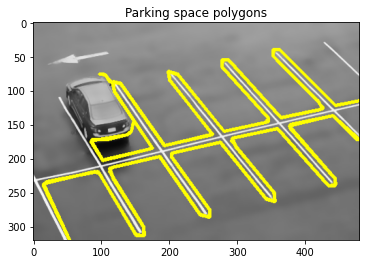

In [106]:
# Question 3-4)

### Parking space polygons ###

from scipy import misc
from scipy.ndimage import gaussian_filter
from scipy.signal import medfilt2d
import random

image = cv2.imread('ParkingLot.jpg')
image = cv2.bilateralFilter(image, 15, 80, 80,None)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold1=50
threshold2=250

testKernel = np.ones((5,5 ),np.float32)/49 #5x5 Kernel
gray = cv2.dilate(gray, testKernel, iterations=3) 
gray = cv2.erode(gray, testKernel, iterations=1)

edged = cv2.Canny(gray, threshold1, threshold2)
kernel = np.ones((3,3), np.uint8)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of Contours = " + str(len(contours)))
contoursFound = 0
totalContours = []

for contour in contours :
    area = cv2.contourArea(contour)
    print("area",area)

    # Shortlisting the regions based on there area.
    if area > 100:         
        approx = cv2.approxPolyDP(contour,0.001 * cv2.arcLength(contour, True), True)
        M = cv2.moments(contour)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    
        cv2.drawContours(image, [approx], -1, (255, 255, 0), 3)
 
plt.title("Parking space polygons")
display = plt.imshow(image)